## Estadística Aplicada

Sesión 20 - 19 de octubre

David Eduardo Gómez Marín   1914352     G41

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [46]:
##Especializadas
#Librerías especializadas
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf, plot_predict

#estimar modelo ARIMA
from statsmodels.tsa.arima.model import ARIMA

##
import pmdarima as pm

In [47]:
#Datos
df_amazon = pd.read_excel('amazon.xlsx')

In [48]:
df_amazon.head()

fecha     amazon
0 2015-01-02  24.573591
1 2015-01-05  23.830631
2 2015-01-06  24.070295
3 2015-01-07  24.453760
4 2015-01-08  24.301968

In [49]:
df_amazon.dtypes

fecha     datetime64[ns]
amazon           float64
dtype: object

In [50]:
#Convertir fecha en index para predecir
df_amazon = df_amazon.set_index('fecha')
df_amazon = df_amazon.asfreq('B')
# asfreq('B') es la frecuencia de bussines days, asi como asfreq('MS') es la frecuencia en meses
# #Las fechas  son los días hábiles o bussiness days

In [51]:
df_amazon.isnull().sum()

amazon    47
dtype: int64

(20.0, 40.0)

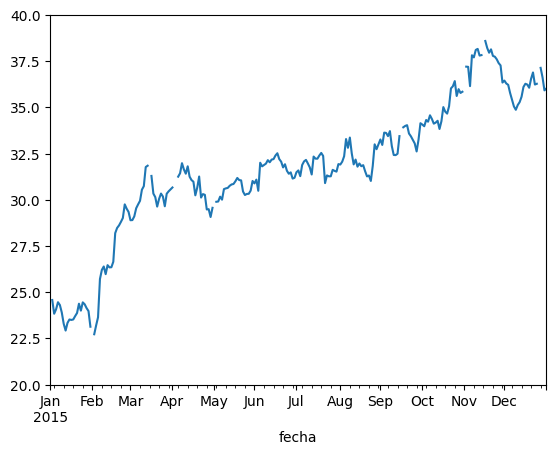

In [52]:
df_amazon['amazon'].plot()
plt.xlim('2015-01-01', '2015-12-31')
plt.ylim(20,40)

Existen missing values por eso no es continua la grafica, porque faltan datos

In [53]:
#Imputamos missing values, de manera que method = 'pad', esto hace que, si el sábado hay missing value, pues se le asigne el valor anterior, es decir, el del viernes 
df_amazon['amazon'] = df_amazon['amazon'].fillna(method='pad')

(20.0, 40.0)

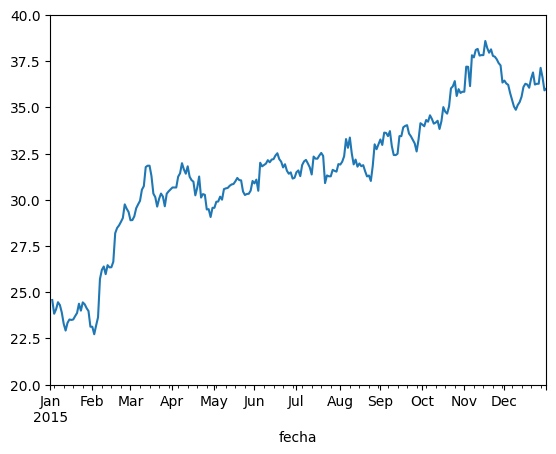

In [54]:
#Grafica sin missing values
df_amazon['amazon'].plot()
plt.xlim('2015-01-01', '2015-12-31')
plt.ylim(20,40)

In [55]:
df_amazon.tail()

amazon
fecha                
2019-12-24  52.599163
2019-12-25  52.599163
2019-12-26  52.561153
2019-12-27  52.865196
2019-12-30  51.478008

In [56]:
#Conservamos todas las observaciones menos la ultima
Ultima_Observacion = df_amazon.loc['2019-12-30']
df_amazon = df_amazon.loc[:'2019-12-27']

In [57]:
Ultima_Observacion

amazon    51.478008
Name: 2019-12-30 00:00:00, dtype: float64

Eliminamos la ultima fecha del df_amazon para de esta manera, predecir con esos datos la 'Ultima_observacion' para ver que tan acertado es el pronóstico. Es decir, vamos a pronosticar un valor que si tenemos haciendo como si no lo tuvieramos

<Axes: xlabel='fecha'>

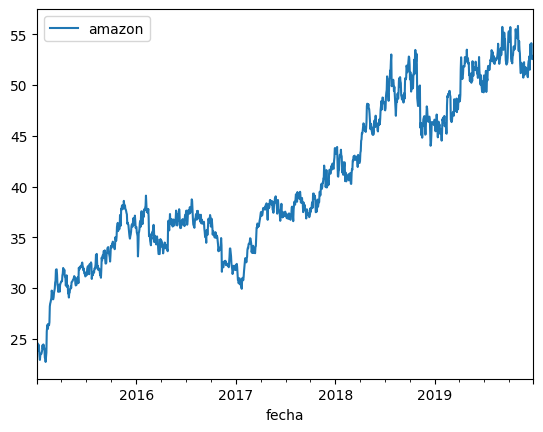

In [58]:
#Verificar a qué proceso estocástico se parece
df_amazon.plot()

In [59]:
#Parece caminata aleatoria
#Hacer prueba dickey-fuller para verificar

prueba_dfa = adfuller(df_amazon['amazon'])
pvalue = prueba_dfa[1]
pvalue.round(2)

0.52

Ya que pvalue = 0.52 < alpha = 0.05 es falso, no rechazamos la H0 de la prueba dickey-fuller aumentada, la cual es que la serie no es estacionaria.

El precio de la acción de amazon es **No estacionaria**

In [60]:
#Calcular priemeras diferencia para tratar de convertirla en estacionaria
df_amazon['amazon_diff'] = df_amazon['amazon'].diff()

<Axes: xlabel='fecha'>

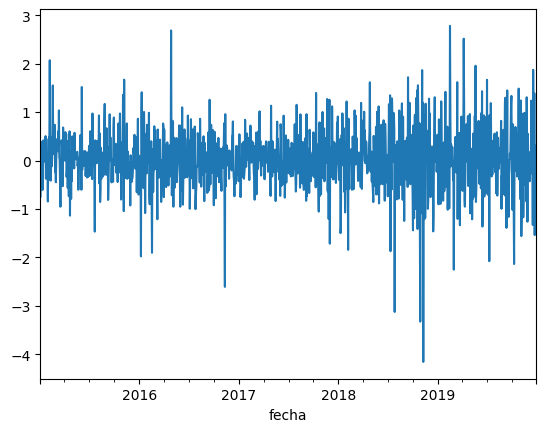

In [61]:
df_amazon['amazon_diff'].plot()

In [64]:
#El proceso estoc'astico df_amazon['amazon_diff] ya parece un proceso estacionario
#Verificar con prueba dickey-fuller
#Ignorar primer valor ya que en la primera diferencia, el primer valor es Nan
prueba_dfa1 = adfuller(df_amazon['amazon_diff'].dropna())
pvalue1 = prueba_dfa1[1]
pvalue1.round(3)



0.0

Rechazamos H0, significa que la sprimeras diferencias de amazon son un proceso **estacionario**

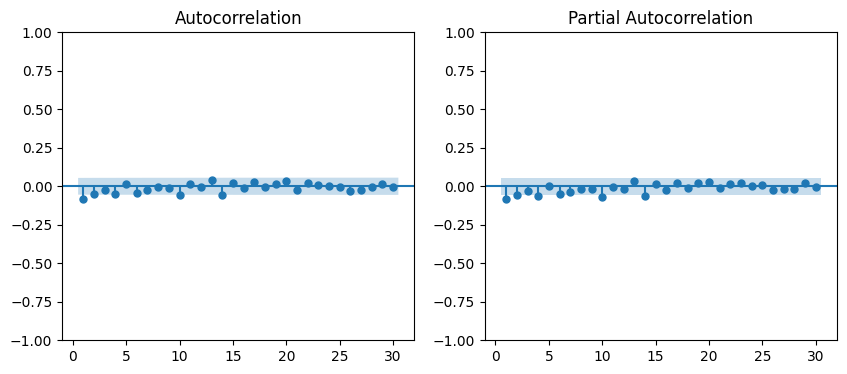

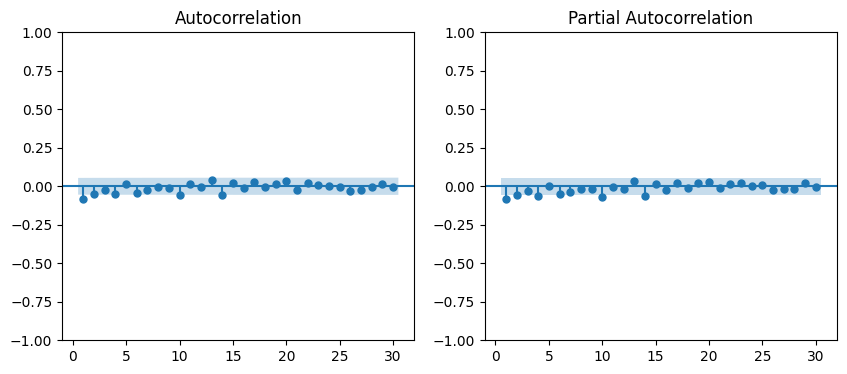

In [68]:
ig, ax = plt.subplots(1,2, figsize=(10,4))

#1
plot_acf(df_amazon['amazon_diff'].dropna(), zero=False, lags=30, ax= ax[0])

#2
plot_pacf(df_amazon['amazon_diff'].dropna(), zero=False, lags=30, ax= ax[1])

Pendiente...